# Gabor filtering example 2
## 

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# function to compute the image power. input could be graylevel or color. 
#
def am_power(a):
    dim1 = a.shape
    
    if len(dim1)==2:
        sz = dim1[0] * dim1[1] 
    elif len(dim1)==3:
        sz = dim1[0] * dim1[1] * dim1[2]        
    pa = np.sum(np.multiply(a,a)) / sz    
    
    return pa

In [3]:
# input image, you may try different images. e.g.:
# diag_texture.bmp
# IMG_8561.JPG
# IMG_0054.JPG
# hor_texture.jpg 
#
img = cv2.imread('images/IMG_20200111_141756.jpg',0)
cv2.imshow('image', img)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

## Gabor filters
Python:
cv.getGaborKernel(	ksize, sigma, theta, lambd, gamma[, psi[, ktype]]	) ->	retval
#include <opencv2/imgproc.hpp>

Returns Gabor filter coefficients.

For more details about gabor filter equations and parameters, see: Gabor Filter.

Parameters
ksize	Size of the filter returned.
sigma	Standard deviation of the gaussian envelope.
theta	Orientation of the normal to the parallel stripes of a Gabor function.
lambd	Wavelength of the sinusoidal factor.
gamma	Spatial aspect ratio.
psi	Phase offset.
ktype	Type of filter coefficients. It can be CV_32F or CV_64F .


### TEST 1: 
testing different filter rotations, theta, and the results 
check the shape and energy of the filtered images after applying any rotated filter
### Attention: 
a Gabor filter with larger wavelength or lower frequency detect the lower spatial frequency patterns and lines in your image, while a Gabor filter with shorter wavelength or higher frequency detect the higher spatial frequency patterns and lines in your image.
#### also,
the orientation/direction of your Gabor filter, suggests that lines/edges in a particular direction would be highlighted. 


image power = 114.1635314792788
index: 332 	 theta =  0.0 	 detail image power= 4.119877521065616
index: 334 	 theta =  0.785 	 detail image power= 2.1501702320021145
index: 336 	 theta =  1.571 	 detail image power= 5.070764174235871
index: 338 	 theta =  2.356 	 detail image power= 1.8868202484220813


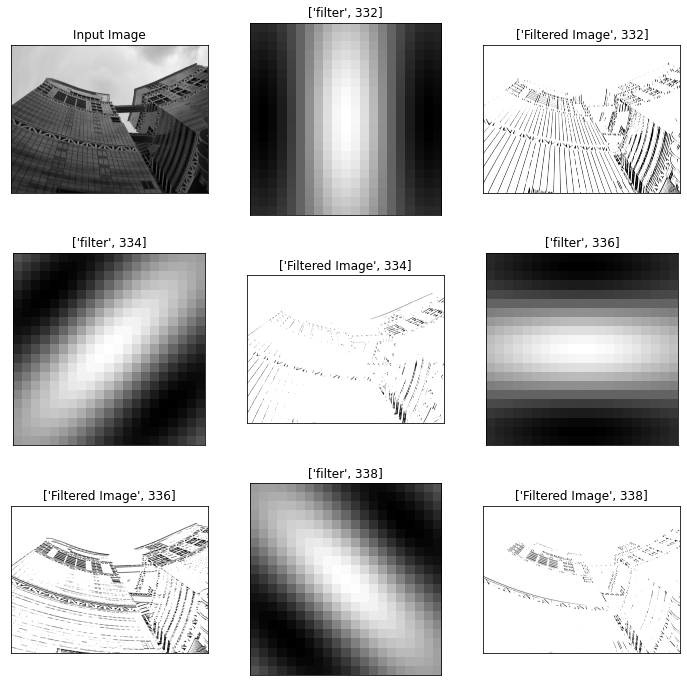

In [4]:
# test 1: different directions / orientations: theta
# other parameters are fixed
ksize = (21,21)
sigma = 10
lambd= 20
gamma=1
phi = 0
# ------------------------ 
plt.subplots(3,3,figsize=(12,12))
plt.subplot(331),plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
kk=332
print('image power =' , am_power(img) )
# -------------------------
for th in [0.0 , np.pi/4 , np.pi/2 , np.pi*3/4]:
    g_kernel = cv2.getGaborKernel(ksize, sigma, th, lambd, gamma, phi, ktype=cv2.CV_32F)
    filtered_img = cv2.filter2D(img, cv2.CV_8UC3, g_kernel)
    
    plt.subplot(kk),plt.imshow(g_kernel , cmap = 'gray')
    plt.title(['filter',kk]), plt.xticks([]), plt.yticks([])
    plt.subplot(kk+1),plt.imshow(filtered_img , cmap = 'gray')
    plt.title(['Filtered Image', kk]), plt.xticks([]), plt.yticks([])
    print('index:', kk, '\t theta = ', round(th,3) ,'\t detail image power=', am_power(filtered_img))
    kk += 2

now we fix the theta, and change the sigma= filter Guassian envelop width, and 
lambd= filter wavelength (1/frequency) and showing the results.
you may try different images, and different sigma/lambd 

image power = 114.1635314792788
index:  332 	sigma , lambda =  8  ,  16 	 detail image power= 5.425708035971741
index:  334 	sigma , lambda =  10  ,  20 	 detail image power= 2.1501702320021145
index:  336 	sigma , lambda =  10  ,  4 	 detail image power= 94.93417533220396
index:  338 	sigma , lambda =  4  ,  4 	 detail image power= 34.37622136017397


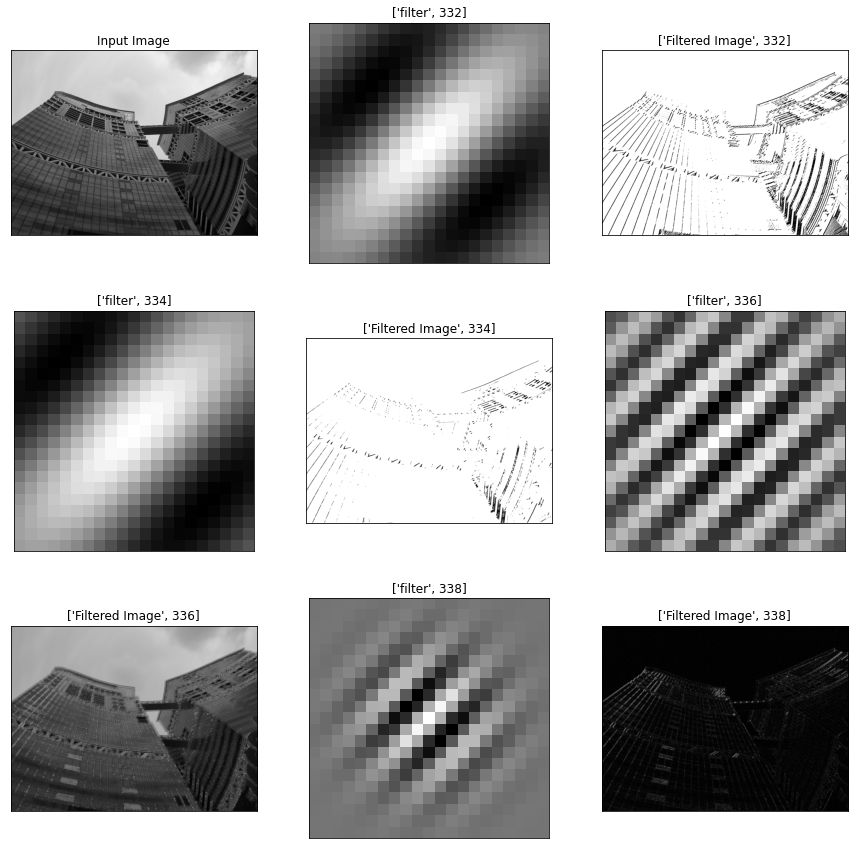

In [9]:
#### test 2: different scale/ frequency: sigma and lambda
# other parameters are fixed
ksize = (21,21)
th = np.pi/4
gamma=1
phi = 0
# ------------------------ 
plt.subplots(3,3,figsize=(15,15))
plt.subplot(331),plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
kk=332
print('image power =' , am_power(img) )
# -------------------------
for sigma,lambd in [[8,16],[10,20], [10, 4], [4,4]]:
    g_kernel = cv2.getGaborKernel(ksize, sigma, th, lambd, gamma, phi, ktype=cv2.CV_32F)
    filtered_img = cv2.filter2D(img, cv2.CV_8UC3, g_kernel)
    
    plt.subplot(kk),plt.imshow(g_kernel , cmap = 'gray')
    plt.title(['filter',kk]), plt.xticks([]), plt.yticks([])
    plt.subplot(kk+1),plt.imshow(filtered_img , cmap = 'gray')
    plt.title(['Filtered Image',kk]), plt.xticks([]), plt.yticks([])
    print('index: ',kk,'\tsigma , lambda = ', round(sigma,4),' , ', round(lambd,4),'\t detail image power=', am_power(filtered_img))
    kk += 2

now we check the gamma and phi, see what's happened when we change them
1st row: different gamma
2nd row: different phi, it actually determines the phase of the Gabor filter's sine wave

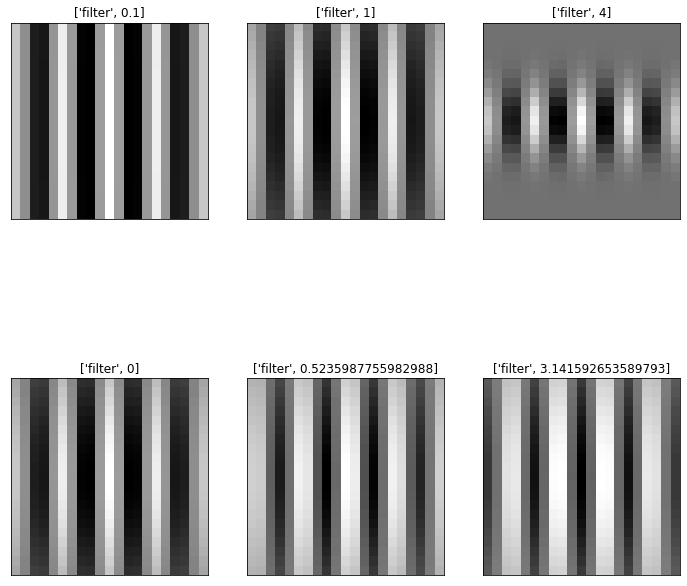

In [13]:
# test 3: different Phi and sigma, just filters
# other parameters are fixed
ksize = (21,21)
th = 0
sigma= 10
lambd = 5
# ------------------------ 
kk=231
# -------------------------
plt.subplots(2,3,figsize=(12,12))
phi=0
for gamma in [0.1,1,4]:
    g_kernel = cv2.getGaborKernel(ksize, sigma, th, lambd, gamma, phi, ktype=cv2.CV_32F)
    plt.subplot(kk),plt.imshow(g_kernel , cmap = 'gray')
    plt.title(['filter',gamma]), plt.xticks([]), plt.yticks([])
    kk += 1
gamma= 1
for phi in [0 , np.pi/6 ,np.pi]:
    g_kernel = cv2.getGaborKernel(ksize, sigma, th, lambd, gamma, phi, ktype=cv2.CV_32F)
    plt.subplot(kk),plt.imshow(g_kernel , cmap = 'gray')
    plt.title(['filter',phi]), plt.xticks([]), plt.yticks([])
    kk += 1